In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/timeseriescrime/Robberies.csv', index_col= 'Months', parse_dates= ['Months'])

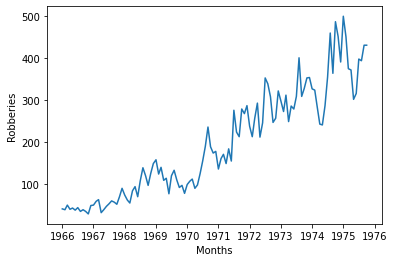

In [ ]:
sns.lineplot(data=data["Robberies"])

In [ ]:
data['1months'] = data['Robberies'].shift(1)
data['2months'] = data['Robberies'].shift(2)
data['3months'] = data['Robberies'].shift(3)

In [ ]:
data = data.dropna()

In [ ]:
data.tail()

,Robberies,1months,2months,3months
Months,,,,
1975-06-01,316,302.0,372.0,375.0
1975-07-01,398,316.0,302.0,372.0
1975-08-01,394,398.0,316.0,302.0
1975-09-01,431,394.0,398.0,316.0
1975-10-01,431,431.0,394.0,398.0


In [ ]:
linreg = LinearRegression()

In [ ]:
x1, x2, x3, y = data['1months'], data['2months'], data['3months'], data['Robberies']

In [ ]:
x1, x2, x3, y = np.array(x1), np.array(x2), np.array(x3), np.array(y)

In [ ]:
x1, x2, x3, y = x1.reshape(-1, 1), x2.reshape(-1, 1), x3.reshape(-1, 1), y.reshape(-1, 1)

In [ ]:
X = np.concatenate((x1, x2, x3), axis= 1)

In [ ]:
X

array([[ 50.,  39.,  41.],
       [ 40.,  50.,  39.],
       [ 43.,  40.,  50.],
       [ 38.,  43.,  40.],
       [ 44.,  38.,  43.],
       [ 35.,  44.,  38.],
       [ 39.,  35.,  44.],
       [ 35.,  39.,  35.],
       [ 29.,  35.,  39.],
       [ 49.,  29.,  35.],
       [ 50.,  49.,  29.],
       [ 59.,  50.,  49.],
       [ 63.,  59.,  50.],
       [ 32.,  63.,  59.],
       [ 39.,  32.,  63.],
       [ 47.,  39.,  32.],
       [ 53.,  47.,  39.],
       [ 60.,  53.,  47.],
       [ 57.,  60.,  53.],
       [ 52.,  57.,  60.],
       [ 70.,  52.,  57.],
       [ 90.,  70.,  52.],
       [ 74.,  90.,  70.],
       [ 62.,  74.,  90.],
       [ 55.,  62.,  74.],
       [ 84.,  55.,  62.],
       [ 94.,  84.,  55.],
       [ 70.,  94.,  84.],
       [108.,  70.,  94.],
       [139., 108.,  70.],
       [120., 139., 108.],
       [ 97., 120., 139.],
       [126.,  97., 120.],
       [149., 126.,  97.],
       [158., 149., 126.],
       [124., 158., 149.],
       [140., 124., 158.],
 

In [ ]:
X_train, X_test, y_train, y_test = X[:-60], X[-60: ], y[:-60], y[-60:]

In [ ]:
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = linreg.predict(X_test)

In [ ]:
y_test.shape

(60, 1)

In [ ]:
y_pred.shape

(60, 1)

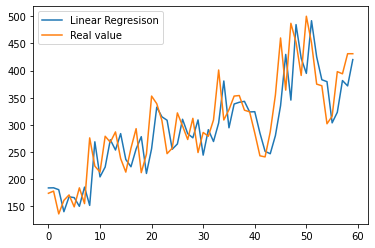

In [ ]:
plt.plot(y_pred, label= "Linear Regresison")
plt.plot(y_test, label= "Real value")
plt.legend(loc = "upper left")
plt.show()